In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [2]:
try:
    from google.colab import drive
    drive.mount('/content/drive')
    ruta = "/content/drive/MyDrive/Datos csv/DATOS.csv"
    datos = pd.read_csv(ruta, sep=None, engine='python')
    print("✅ Carga exitosa del dataset.")
except Exception as e:
    print("Error al cargar el dataset:", e)

Mounted at /content/drive
✅ Carga exitosa del dataset.


# 📊 Dataset

El dataset contiene información detallada sobre transacciones bancarias, incluyendo datos relacionados con las cuentas, los montos, los tipos de transacción y otros atributos relevantes. En total, el conjunto de datos está compuesto por 2.512 filas y 15 columnas, las cuales registran diversos aspectos del comportamiento financiero de las operaciones analizadas.

In [3]:
print(datos.shape)
datos.head()

(2512, 15)


,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,AccountBalance,PreviousTransactionDate
0,TX000001,AC00128,14.09,2023-04-11 16:29:14,Debit,San Diego,D000380,162.198.218.92,M015,ATM,70,Doctor,81,5112.21,2024-11-04 8:08:08
1,TX000002,AC00455,376.24,2023-06-27 16:44:19,Debit,Houston,D000051,13.149.61.4,M052,ATM,68,Doctor,141,13758.91,2024-11-04 8:09:35
2,TX000003,AC00019,126.29,2023-07-10 18:16:08,Debit,Mesa,D000235,215.97.143.157,M009,Online,19,Student,56,1122.35,2024-11-04 8:07:04
3,TX000004,AC00070,184.50,2023-05-05 16:32:11,Debit,Raleigh,D000187,200.13.225.150,M002,Online,26,Student,25,8569.06,2024-11-04 8:09:06
4,TX000005,AC00411,13.45,2023-10-16 17:51:24,Credit,Atlanta,D000308,65.164.3.100,M091,Online,26,Student,198,7429.40,2024-11-04 8:06:39


In [48]:
# Columnas númericas

numericas = datos.select_dtypes(include=['number'])
print(numericas.columns)

Index(['TransactionAmount', 'CustomerAge', 'TransactionDuration',
       'AccountBalance', 'Mes'],
      dtype='object')


In [51]:
# Columnas categoricas

categoricas = datos.select_dtypes(include=['object', 'category']).columns
print(categoricas.tolist())

['TransactionID', 'AccountID', 'TransactionType', 'Location', 'DeviceID', 'IP Address', 'MerchantID', 'Channel', 'CustomerOccupation', 'PreviousTransactionDate']


### 🧩 Tipo de datos

En el dataset se identifican 11 variables categóricas, 2 variables numéricas de tipo flotante y 2 variables numéricas enteras. Esta distribución refleja la combinación de datos cualitativos y cuantitativos utilizada para representar las diferentes características de las transacciones bancarias.

In [30]:
# Muestra variables categóricas y numéricas
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2512 entries, 0 to 2511
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   TransactionID            2512 non-null   object        
 1   AccountID                2512 non-null   object        
 2   TransactionAmount        2512 non-null   float64       
 3   TransactionDate          2512 non-null   datetime64[ns]
 4   TransactionType          2512 non-null   object        
 5   Location                 2512 non-null   object        
 6   DeviceID                 2512 non-null   object        
 7   IP Address               2512 non-null   object        
 8   MerchantID               2512 non-null   object        
 9   Channel                  2512 non-null   object        
 10  CustomerAge              2512 non-null   int64         
 11  CustomerOccupation       2512 non-null   object        
 12  TransactionDuration      2512 non-

# 🧼 Limpieza de datos

Se llevó a cabo un proceso de limpieza del dataset considerando las situaciones más comunes que pueden afectar la calidad de los datos:

1. Valores faltantes en determinadas celdas.

2. Eliminación de columnas irrelevantes, es decir, aquellas que no aportan información útil para el problema de análisis.

3. Detección y eliminación de registros duplicados.

5. Corrección de errores tipográficos presentes en las variables categóricas.

####  1. Datos faltantes



In [52]:
datos.dropna(inplace=True)
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2512 entries, 0 to 2511
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   TransactionID            2512 non-null   object        
 1   AccountID                2512 non-null   object        
 2   TransactionAmount        2512 non-null   float64       
 3   TransactionDate          2512 non-null   datetime64[ns]
 4   TransactionType          2512 non-null   object        
 5   Location                 2512 non-null   object        
 6   DeviceID                 2512 non-null   object        
 7   IP Address               2512 non-null   object        
 8   MerchantID               2512 non-null   object        
 9   Channel                  2512 non-null   object        
 10  CustomerAge              2512 non-null   int64         
 11  CustomerOccupation       2512 non-null   object        
 12  TransactionDuration      2512 non-

#### 2. Eliminación de columnas irrelevantes

No se realizó ningún proceso de eliminación de columnas, ya que tras el análisis inicial se determinó que todas las variables presentes en el dataset aportan información relevante para el estudio y contribuyen al entendimiento del problema planteado.

In [49]:
# Conteo de los diferentes niveles en una columna categórica
cols_cat = ['TransactionID', 'AccountID', 'TransactionDate', 'TransactionType', 'Location', 'DeviceID', 'IP Address', 'MerchantID', 'Channel', 'CustomerOccupation', 'PreviousTransactionDate']

for i, col in enumerate(cols_cat, start=1):
    print(f'Columna {i} ({col}): {datos[col].nunique()} subniveles')



Columna 1 (TransactionID): 2512 subniveles
Columna 2 (AccountID): 495 subniveles
Columna 3 (TransactionDate): 2512 subniveles
Columna 4 (TransactionType): 2 subniveles
Columna 5 (Location): 43 subniveles
Columna 6 (DeviceID): 681 subniveles
Columna 7 (IP Address): 592 subniveles
Columna 8 (MerchantID): 100 subniveles
Columna 9 (Channel): 3 subniveles
Columna 10 (CustomerOccupation): 4 subniveles
Columna 11 (PreviousTransactionDate): 360 subniveles


In [9]:
# Conteo de los diferentes niveles en una columna numéricas
datos.describe()

,TransactionAmount,CustomerAge,TransactionDuration,AccountBalance
count,2512.000000,2512.000000,2512.000000,2512.000000
mean,297.593778,44.673965,119.643312,5114.302966
std,291.946243,17.792198,69.963757,3900.942499
min,0.260000,18.000000,10.000000,101.250000
25%,81.885000,27.000000,63.000000,1504.370000
50%,211.140000,45.000000,112.500000,4735.510000
75%,414.527500,59.000000,161.000000,7678.820000
max,1919.110000,80.000000,300.000000,14977.990000


In [25]:
print("\n🚫 Conteo de valores nulos por columna:")
display(datos.isnull().sum())


🚫 Conteo de valores nulos por columna:


,0
TransactionID,0
AccountID,0
TransactionAmount,0
TransactionDate,0
TransactionType,0
Location,0
DeviceID,0
IP Address,0
MerchantID,0
Channel,0


#### 3. Filas repetidas

In [10]:
print(f'Tamaño de set antes de eliminar filas repetidas: {datos.shape}')
datos.drop_duplicates(inplace=True)
print(f'Tamaño de set después de eliminar filas repetidas: {datos.shape}')

Tamaño de set antes de eliminar filas repetidas: (2512, 15)
Tamaño de set después de eliminar filas repetidas: (2512, 15)


#### 4. Errores tipográficos

/tmp/ipython-input-878610775.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[i].set_xticklabels(ax[i].get_xticklabels(), rotation=30, ha='right')
/tmp/ipython-input-878610775.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[i].set_xticklabels(ax[i].get_xticklabels(), rotation=30, ha='right')
/tmp/ipython-input-878610775.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[i].set_xticklabels(ax[i].get_xticklabels(), rotation=30, ha='right')
/tmp/ipython-input-878610775.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[i].set_xticklabels(ax[i].get_xticklabels(), rotation=30, ha='right')
/tmp/ipython-input-878610775.py:8: UserWarning: set_

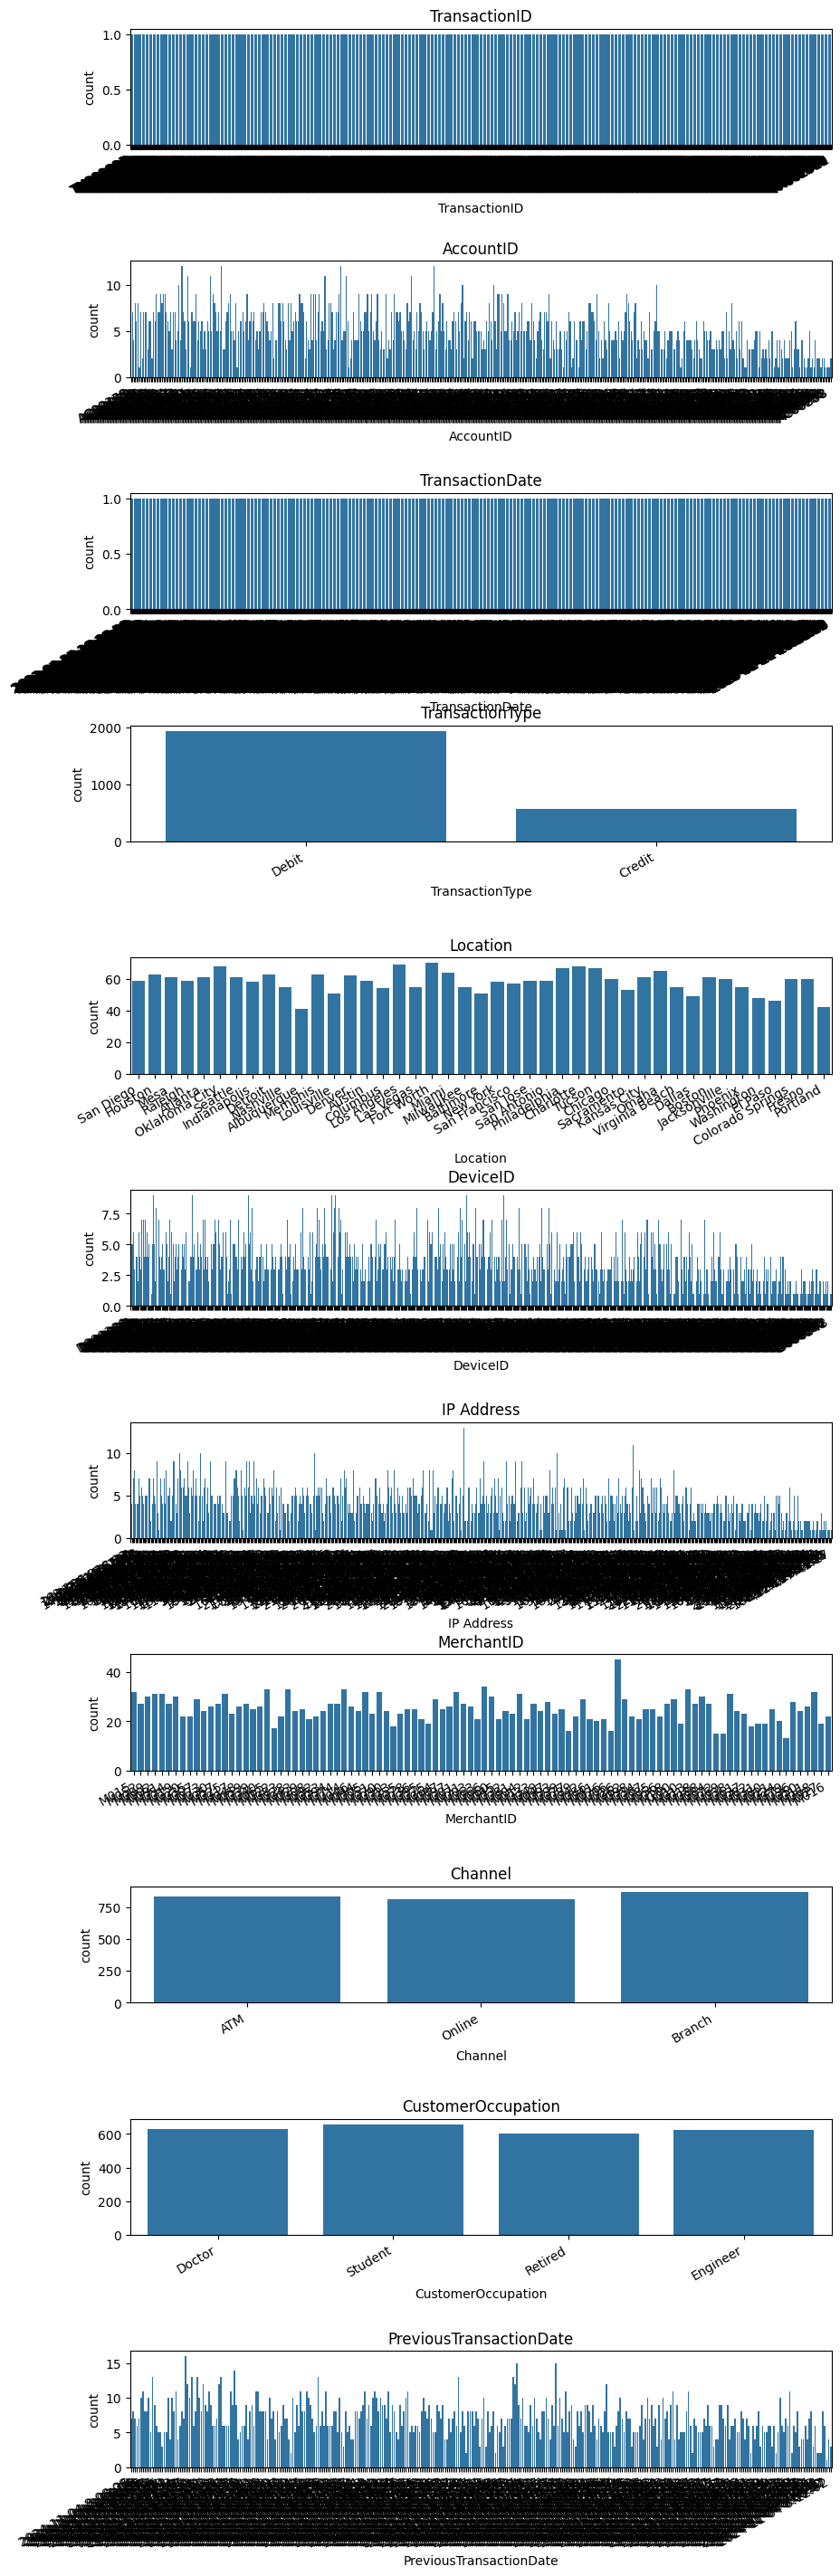

In [11]:
cols_cat = ['TransactionID', 'AccountID', 'TransactionDate', 'TransactionType', 'Location', 'DeviceID', 'IP Address', 'MerchantID', 'Channel', 'CustomerOccupation', 'PreviousTransactionDate']
fig, ax = plt.subplots(nrows=len(cols_cat), ncols=1, figsize=(10, 35))
fig.subplots_adjust(hspace=1)

for i, col in enumerate(cols_cat, start=0):
    sns.countplot(data=datos, x=col, ax=ax[i])
    ax[i].set_title(col)
    ax[i].set_xticklabels(ax[i].get_xticklabels(), rotation=30, ha='right')

In [12]:
datos.shape

(2512, 15)

# 🔍 Analisis exploratorio (EDA)

### 📊 Información de variables estadísticas descriptivas básicas

Se obtiene información sobre las variables numéricas del dataset, analizando su comportamiento estadístico a través de diferentes medidas descriptivas.
Estas permiten comprender la tendencia central, la dispersión y la distribución de los datos:

* count: cantidad de valores numéricos disponibles por variable.

* mean: valor medio o promedio de los datos.

* std: desviación estándar, que indica el grado de dispersión respecto al promedio.

* min y max: valores mínimo y máximo observados.

* 25%, 50% y 75%: representan los cuartiles, que dividen los datos en cuatro partes iguales y permiten analizar su distribución.

In [13]:
datos.describe()

,TransactionAmount,CustomerAge,TransactionDuration,AccountBalance
count,2512.000000,2512.000000,2512.000000,2512.000000
mean,297.593778,44.673965,119.643312,5114.302966
std,291.946243,17.792198,69.963757,3900.942499
min,0.260000,18.000000,10.000000,101.250000
25%,81.885000,27.000000,63.000000,1504.370000
50%,211.140000,45.000000,112.500000,4735.510000
75%,414.527500,59.000000,161.000000,7678.820000
max,1919.110000,80.000000,300.000000,14977.990000


### 🔤 Estadísticas descriptivas de variables categóricas



*   count = Valores no nulos
*   unique = valores únicos o distintos
*   top = valores con más frecuencia
*   freq = frecuencia de valor má frecuente







In [23]:
display(datos.describe(include=['object', 'category']).T)


🔤 Estadísticas descriptivas de variables categóricas:


,count,unique,top,freq
TransactionID,2512,2512,TX002496,1
AccountID,2512,495,AC00460,12
TransactionType,2512,2,Debit,1944
Location,2512,43,Fort Worth,70
DeviceID,2512,681,D000548,9
IP Address,2512,592,200.136.146.93,13
MerchantID,2512,100,M026,45
Channel,2512,3,Branch,868
CustomerOccupation,2512,4,Student,657
PreviousTransactionDate,2512,360,2024-11-04 8:09:17,16


In [56]:
# Configuración del estilo visual
sns.set(style="whitegrid", palette="crest", font_scale=1.1)

### 📊 Grafico de columas númericas

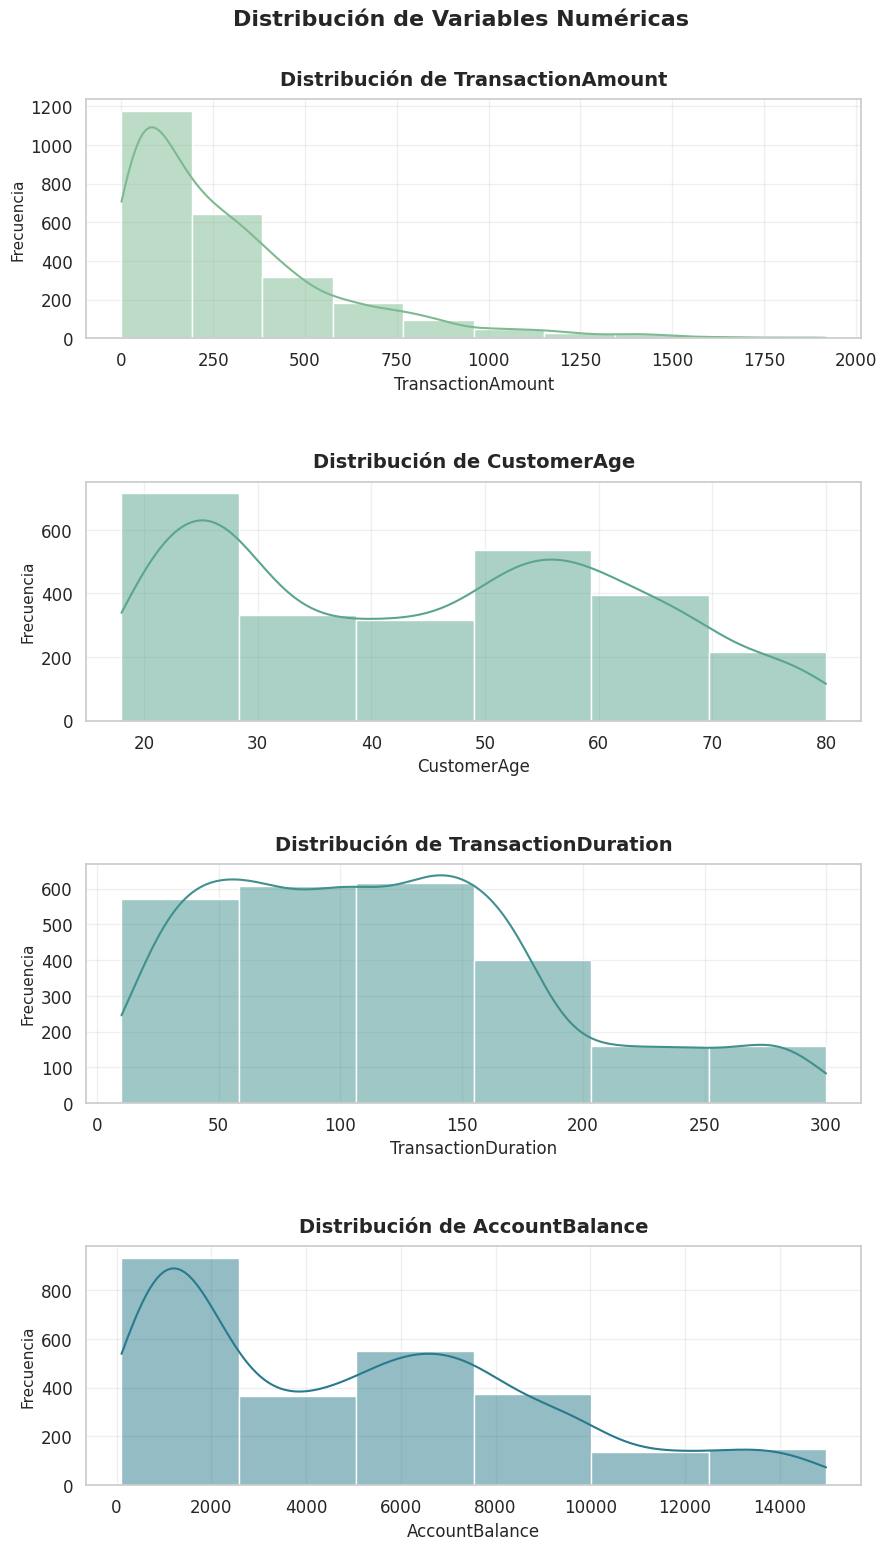

In [55]:
col_num = ['TransactionAmount', 'CustomerAge', 'TransactionDuration', 'AccountBalance']

# Crear figura y ejes
fig, ax = plt.subplots(nrows=len(col_num), ncols=1, figsize=(10, 18))
fig.subplots_adjust(hspace=0.6)

# Generar un histograma con curva KDE para cada variable
for i, col in enumerate(col_num):
    nbins = 10 if col == 'TransactionAmount' else 6
    sns.histplot(
        data=datos,
        x=col,
        ax=ax[i],
        bins=nbins,
        kde=True,
        color=sns.color_palette("crest")[i % len(sns.color_palette("crest"))],
        edgecolor="white"
    )
    ax[i].set_title(f"Distribución de {col}", fontsize=14, weight="bold", pad=10)
    ax[i].set_xlabel(col, fontsize=12)
    ax[i].set_ylabel("Frecuencia", fontsize=11)
    ax[i].grid(alpha=0.3)

# Título general
fig.suptitle("Distribución de Variables Numéricas", fontsize=16, weight="bold", y=0.93)
plt.show()

👀 **Observaciones:**

Las distribuciones presentan una asimetría positiva, concentrando la mayoría de los valores en rangos bajos. En TransactionAmount, predominan montos inferiores a 250 unidades, mientras que las transacciones de alto valor son poco frecuentes.
En CustomerAge, la mayoría de los clientes tiene menos de 30 años, con un grupo menor entre los 50 y 60 años.

### 💳 Distribucón de tipos de transaccion

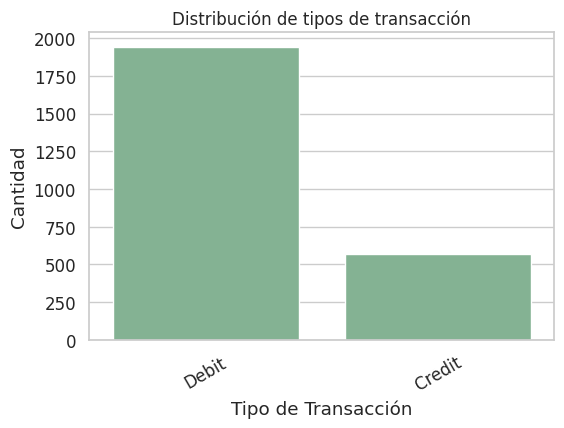

In [57]:
if "TransactionType" in datos.columns:
    plt.figure(figsize=(6, 4))
    sns.countplot(data=datos, x="TransactionType", order=datos["TransactionType"].value_counts().index)
    plt.title("Distribución de tipos de transacción", fontsize=12)
    plt.xlabel("Tipo de Transacción")
    plt.ylabel("Cantidad")
    plt.xticks(rotation=30)
    plt.show()


👀 **Observaciones:**

Las transacciones de débito son las más frecuentes, con un número superior a 1,750 operaciones, mientras que las de crédito presentan una cantidad significativamente menor, con menos de 750 registros.

###🧮 Matriz de correlación variables numéricas

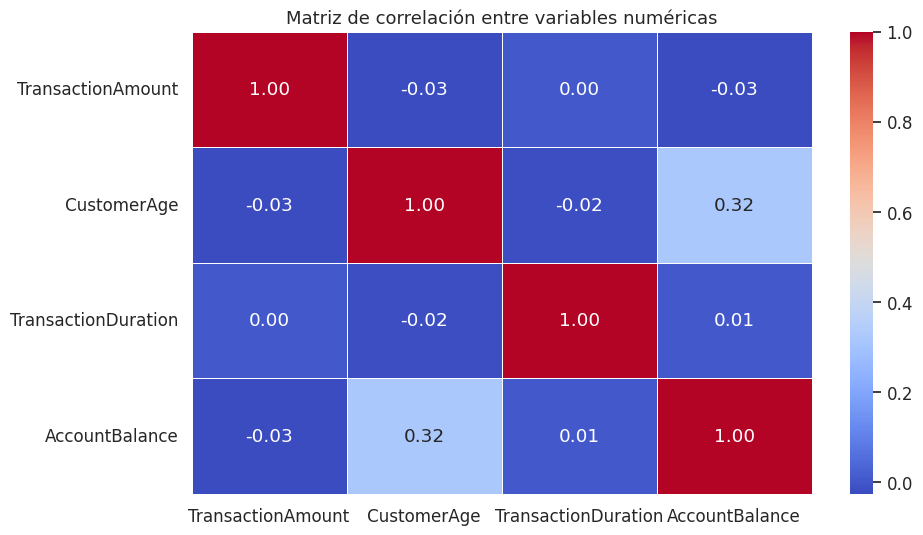

In [58]:
plt.figure(figsize=(10, 6))
corr = datos[num_cols].corr()
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Matriz de correlación entre variables numéricas", fontsize=13)
plt.show()

👀 **Observaciones**

* En general, las correlaciones son muy bajas, lo que sugiere que las variables numéricas son independientes entre sí.

* La correlación más alta es entre CustomerAge y AccountBalance (0.32), lo que indica una relación débil pero positiva: los clientes de mayor edad tienden a tener saldos más altos en sus cuentas.

* Las variables TransactionAmount, TransactionDuration y las demás muestran valores cercanos a 0, indicando poca o ninguna relación lineal entre e

###  ♾️ Relación entre monto y saldo

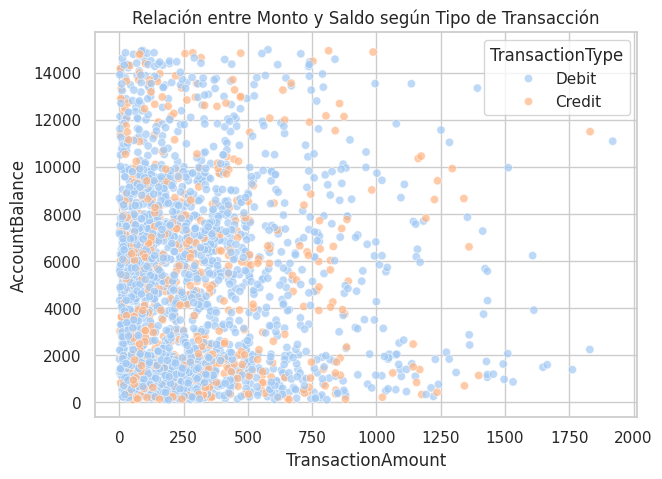

In [38]:
if {"TransactionAmount", "AccountBalance", "TransactionType"}.issubset(datos.columns):
    plt.figure(figsize=(7, 5))
    sns.scatterplot(
        data=datos,
        x="TransactionAmount",
        y="AccountBalance",
        hue="TransactionType",
        alpha=0.7
    )
    plt.title("Relación entre Monto y Saldo según Tipo de Transacción", fontsize=12)
    plt.show()

👀 **Observaciones:**

Se observa que las transacciones de tipo crédito presentan montos y saldos ligeramente superiores en comparación con las de débito, lo que indica una mayor frecuencia o valor asociado a este tipo de operación.

### 📈 Distribución y valores atípicos columnas númericas

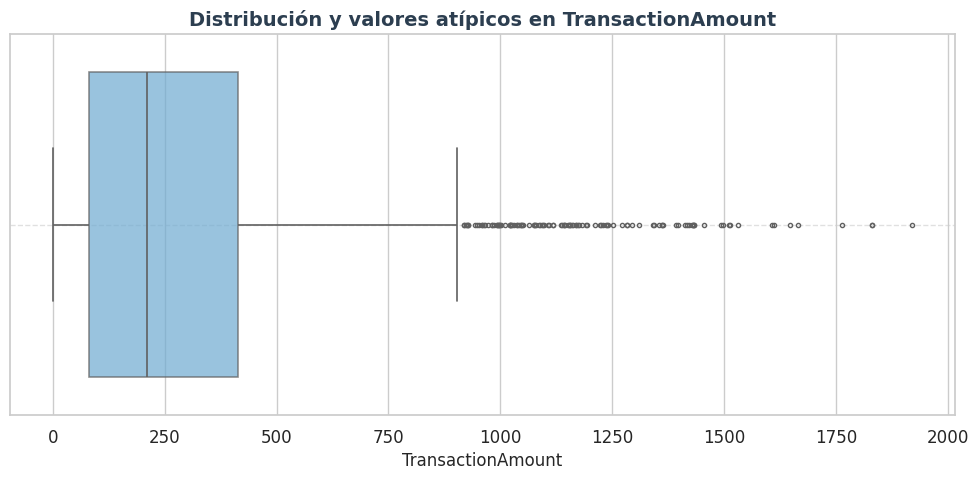

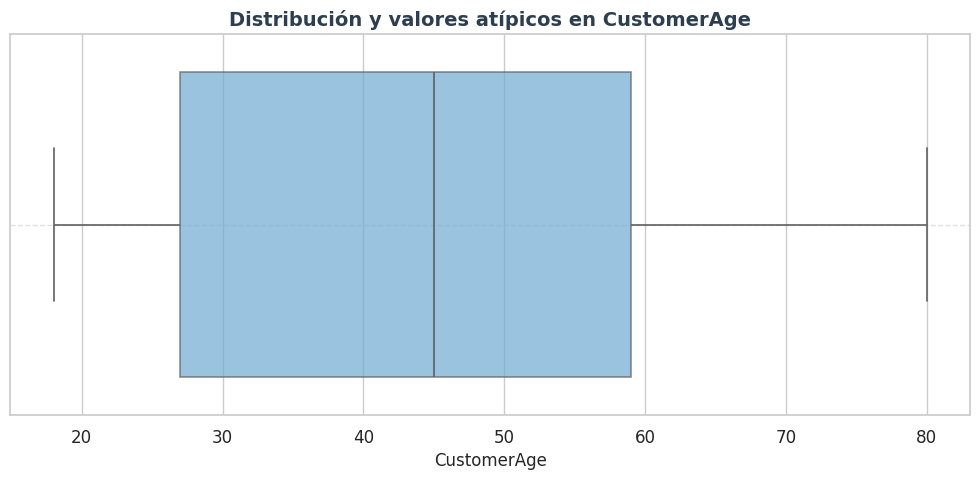

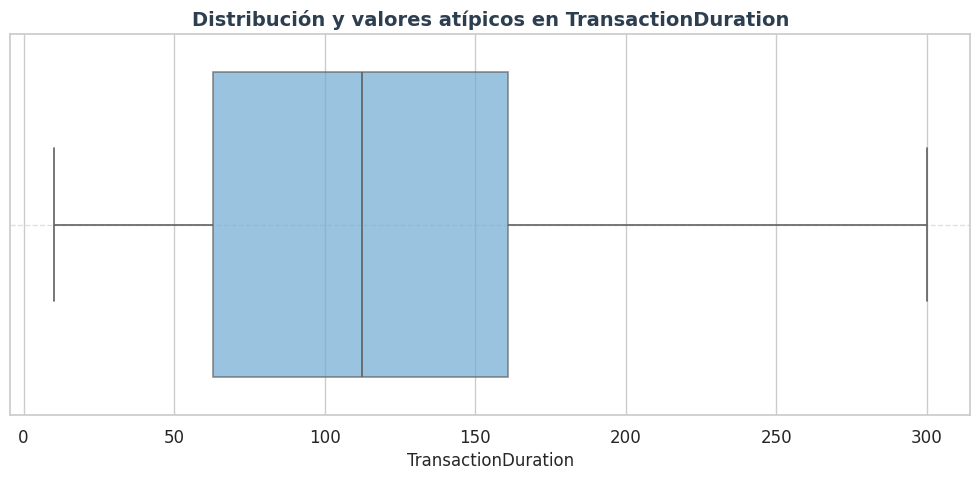

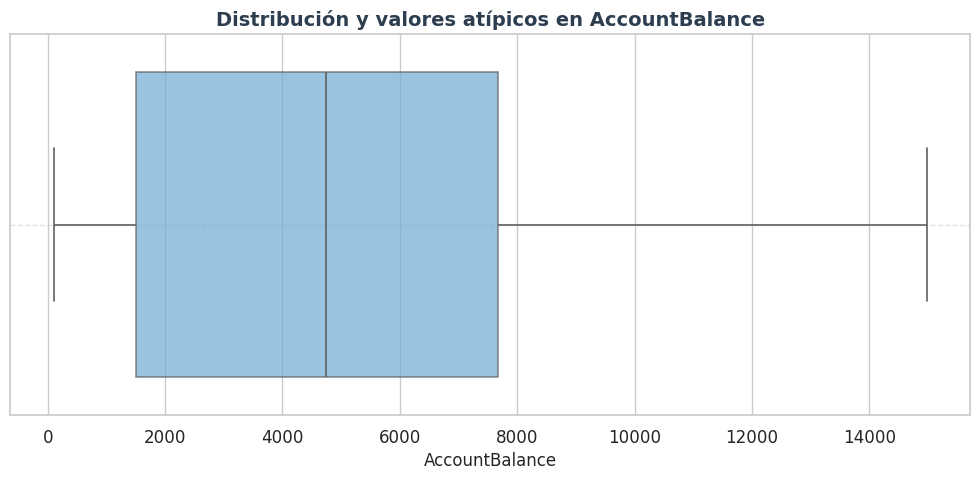

In [60]:
num_cols = datos.select_dtypes(include=['float64', 'int64']).columns

for col in num_cols:
    plt.figure(figsize=(10, 5))
    sns.boxplot(
        data=datos,
        x=col,
        color='#5DADE2',          # Azul más suave
        linewidth=1.2,
        fliersize=3,              # Tamaño de los outliers
        boxprops=dict(alpha=0.7)  # Transparencia
    )
    plt.title(f"Distribución y valores atípicos en {col}", fontsize=14, weight='bold', color='#2C3E50')
    plt.xlabel(col, fontsize=12)
    plt.grid(axis='y', linestyle='--', alpha=0.6)
    plt.tight_layout()
    plt.show()


### 💰 Variables númericas  según el tipo de transacción

/tmp/ipython-input-633753665.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


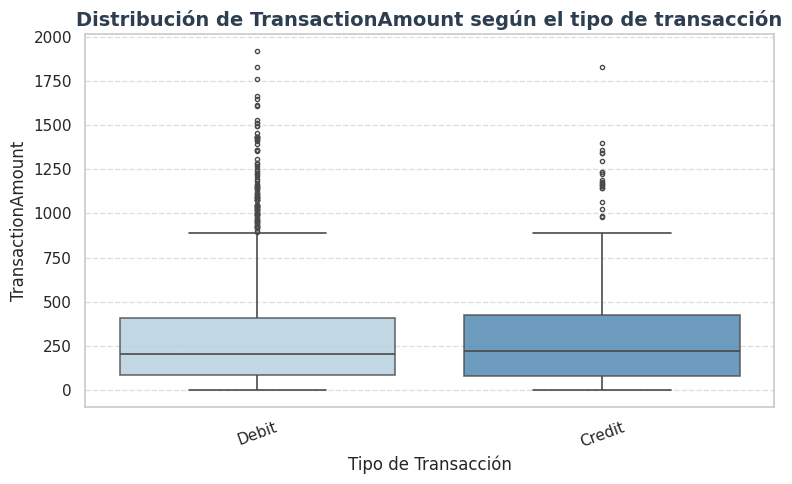

/tmp/ipython-input-633753665.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


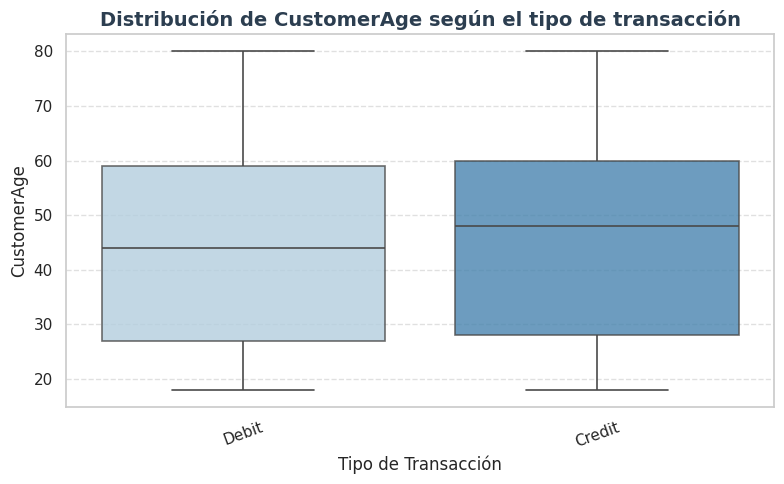

/tmp/ipython-input-633753665.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


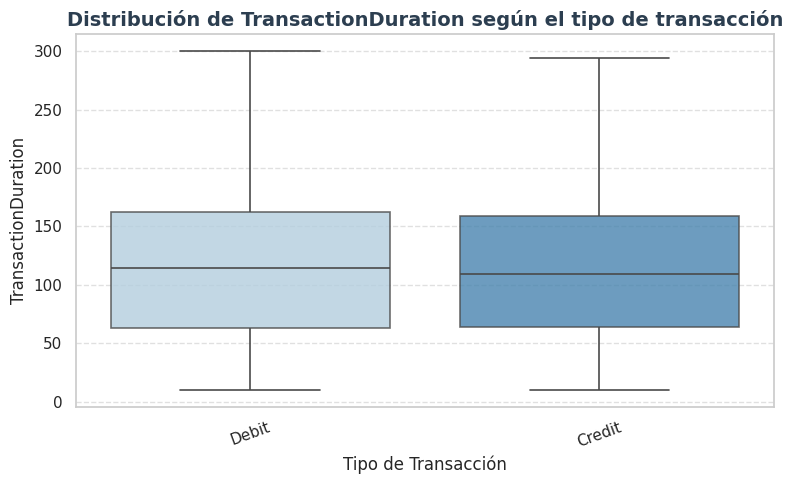

/tmp/ipython-input-633753665.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


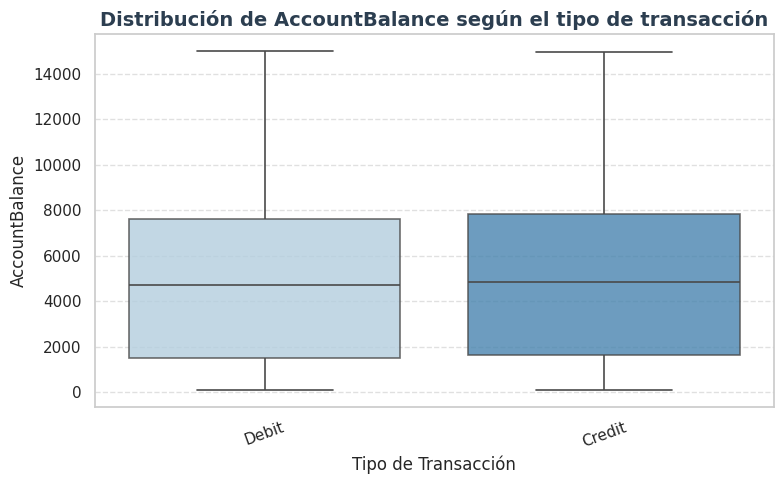

In [61]:
if "TransactionType" in datos.columns:
    sns.set(style="whitegrid", palette="muted")

    for col in num_cols:
        plt.figure(figsize=(8, 5))
        sns.boxplot(
            data=datos,
            x="TransactionType",
            y=col,
            palette="Blues",
            linewidth=1.2,
            fliersize=3,
            boxprops=dict(alpha=0.8)
        )
        plt.title(f"Distribución de {col} según el tipo de transacción", fontsize=14, weight='bold', color='#2C3E50')
        plt.xlabel("Tipo de Transacción", fontsize=12)
        plt.ylabel(col, fontsize=12)
        plt.xticks(rotation=20)
        plt.grid(axis='y', linestyle='--', alpha=0.6)
        plt.tight_layout()
        plt.show()

### 🔃 Relación entre variables numéricas

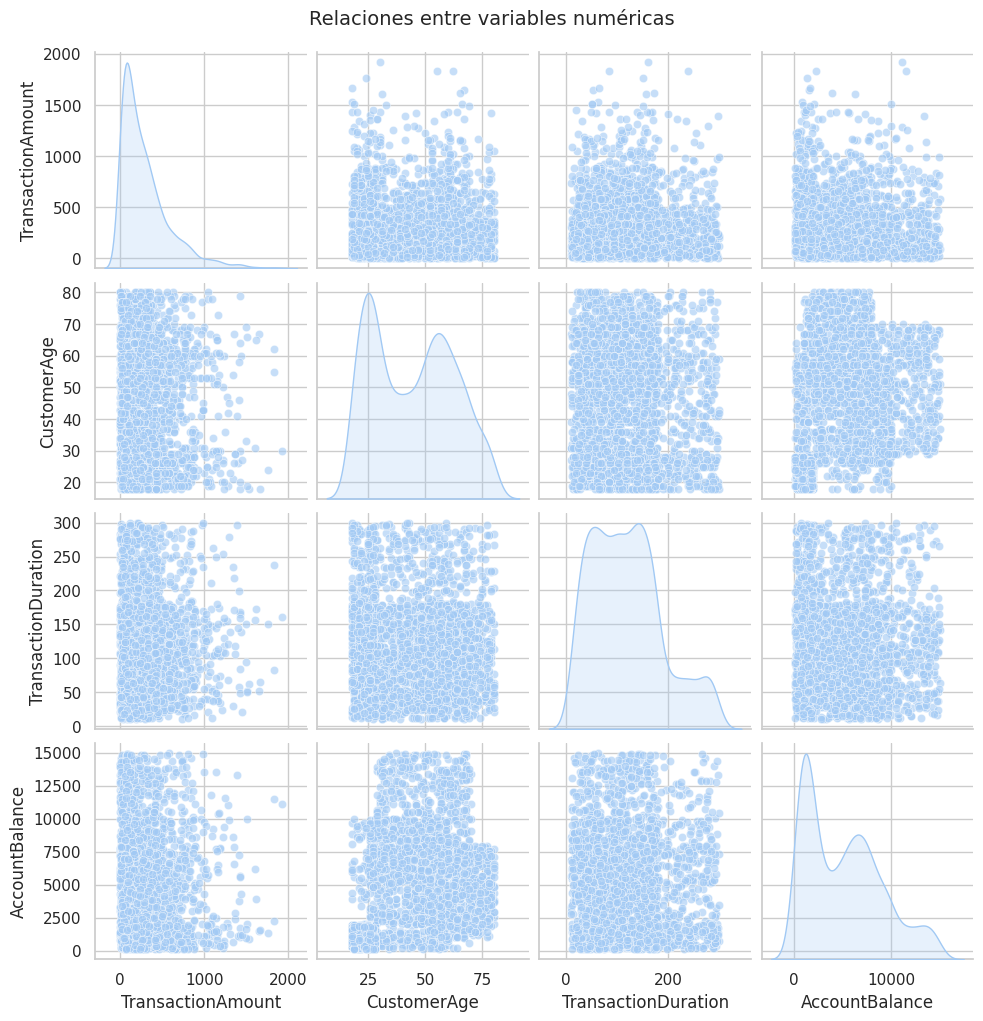

In [44]:
sns.pairplot(datos[num_cols], diag_kind="kde", plot_kws={'alpha':0.6})
plt.suptitle("Relaciones entre variables numéricas", y=1.02, fontsize=14)
plt.show()

👀 **Observaciones:**

Los diagramas de caja permiten identificar cómo varían las variables numéricas en función del tipo de transacción. Se observa que existen diferencias notorias en la mediana y dispersión de algunas variables según el tipo de transacción, lo cual podría indicar patrones específicos asociados al comportamiento financiero de cada categoría. Además, la presencia de valores atípicos sugiere transacciones inusuales que podrían requerir una revisión adicional o ser indicios de posibles fraudes.

### ⚖️ Cantidad de transacciones por canal y tipo

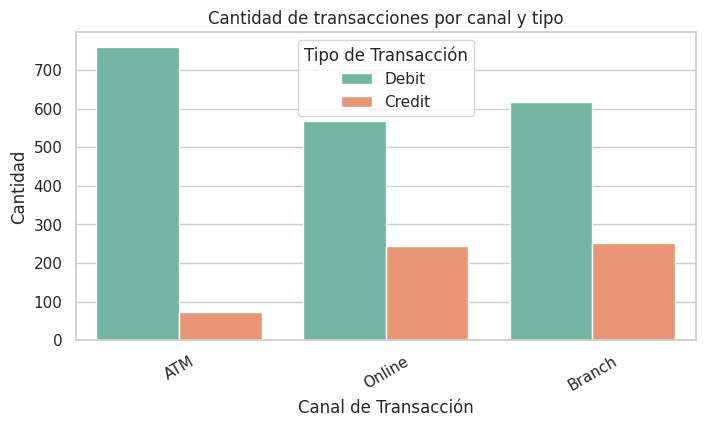

In [62]:
if {"Channel", "TransactionType"}.issubset(datos.columns):
    plt.figure(figsize=(8, 4))
    sns.countplot(data=datos, x="Channel", hue="TransactionType", palette="Set2")
    plt.title("Cantidad de transacciones por canal y tipo", fontsize=12)
    plt.xlabel("Canal de Transacción")
    plt.ylabel("Cantidad")
    plt.xticks(rotation=30)
    plt.legend(title="Tipo de Transacción")
    plt.show()

👀 **Observaciones:**

Se evidencia que las transacciones de débito son las más frecuentes, siendo el cajero automático (ATM) el canal de uso predominante. En contraste, las transacciones de crédito presentan una mayor incidencia en los canales en línea (Online) y en sucursal (Branch), lo que refleja diferencias en los hábitos y preferencias de los usuarios según el tipo de transacción.

### 📇 Monto promedio por ocupación y tipo de transacción

/tmp/ipython-input-3142415502.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=datos, x="CustomerOccupation", y="TransactionAmount", hue="TransactionType", ci=None)


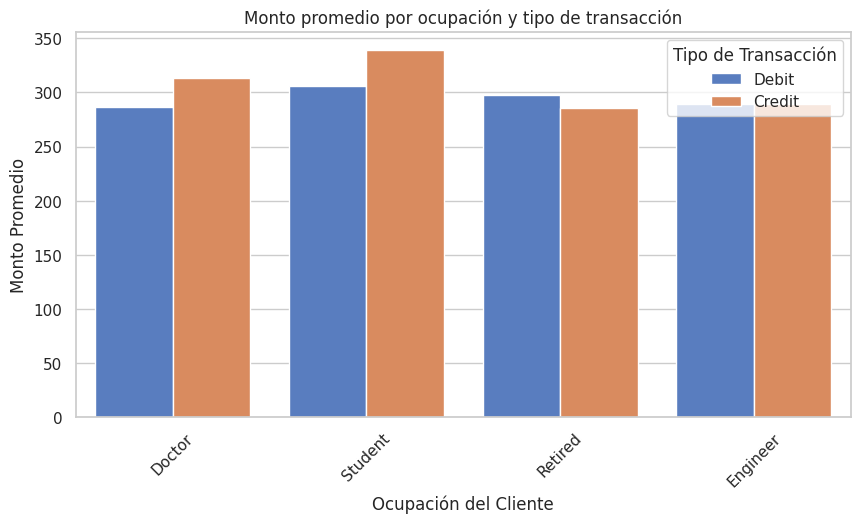

In [63]:
if {"CustomerOccupation", "TransactionAmount", "TransactionType"}.issubset(datos.columns):
    plt.figure(figsize=(10, 5))
    sns.barplot(data=datos, x="CustomerOccupation", y="TransactionAmount", hue="TransactionType", ci=None)
    plt.title("Monto promedio por ocupación y tipo de transacción", fontsize=12)
    plt.xlabel("Ocupación del Cliente")
    plt.ylabel("Monto Promedio")
    plt.xticks(rotation=45)
    plt.legend(title="Tipo de Transacción")
    plt.show()

👀 **Observaciones:**

Se observa que los montos de transacción más altos corresponden a las operaciones de crédito, las cuales son realizadas principalmente por personas con ocupación de estudiante. En cuanto a las transacciones de débito, se evidencia que los montos son relativamente similares entre las diferentes ocupaciones, sin una variación significativa entre los grupos.

# 🤖 Modelado con Machine Learning



### Definición de variables a predecir

In [68]:
# Definir variable objetivo (ejemplo: tipo de transacción)
y = datos["TransactionType"]
X = datos.drop("TransactionType", axis=1)

In [69]:
# Codificación variables categóricas
X = pd.get_dummies(X, drop_first=True)
le = LabelEncoder()
y = le.fit_transform(y)

In [70]:
# Divición en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [72]:
# Escalamiento
scaler = StandardScaler()
X_train = X_train.drop('TransactionDate', axis=1)
X_test = X_test.drop('TransactionDate', axis=1)
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [73]:
# Modelo 1: Regresión Logística
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [74]:
# Modelo 2: Random Forest
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

### ⚙️ Predicciones de Regresión Logística y Random Forest

In [76]:
# Predicciones
y_pred_log = log_reg.predict(X_test)
y_pred_rf = rf.predict(X_test)

# Métricas
print("📈 Regresión Logística:")
print(classification_report(y_test, y_pred_log))
print("Matriz de confusión:\n", confusion_matrix(y_test, y_pred_log))

print("\n🌲 Random Forest:")
print(classification_report(y_test, y_pred_rf))
print("Matriz de confusión:\n", confusion_matrix(y_test, y_pred_rf))

📈 Regresión Logística:
              precision    recall  f1-score   support

           0       0.28      0.08      0.12       112
           1       0.78      0.94      0.85       391

    accuracy                           0.75       503
   macro avg       0.53      0.51      0.49       503
weighted avg       0.67      0.75      0.69       503

Matriz de confusión:
 [[  9 103]
 [ 23 368]]

🌲 Random Forest:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       112
           1       0.78      1.00      0.87       391

    accuracy                           0.78       503
   macro avg       0.39      0.50      0.44       503
weighted avg       0.60      0.78      0.68       503

Matriz de confusión:
 [[  0 112]
 [  0 391]]


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [77]:
# Comparar precisión
print("\nComparación de precisión:")
print(f"Regresión Logística: {accuracy_score(y_test, y_pred_log):.4f}")
print(f"Random Forest: {accuracy_score(y_test, y_pred_rf):.4f}")


Comparación de precisión:
Regresión Logística: 0.7495
Random Forest: 0.7773


### 🧠  Optimización de hiperparámetros

En lugar de probar todas las combinaciones posibles, toma muestras aleatorias del espacio de parámetros.

In [88]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from scipy.stats import randint

# Definimos rangos en lugar de listas fijas
param_dist = {
    'n_estimators': randint(100, 400),
    'max_depth': [5, 10, 15, None],
    'min_samples_split': randint(2, 10)
}

# Configurar búsqueda aleatoria
random_search = RandomizedSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_distributions=param_dist,
    n_iter=10,          # Número de combinaciones aleatorias a probar
    cv=3,
    scoring='accuracy',
    n_jobs=-1,
    random_state=42,
    verbose=1
)

# Entrenamiento
random_search.fit(X_train, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42),
                   n_jobs=-1,
                   param_distributions={'max_depth': [5, 10, 15, None],
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7e8e455dbaa0>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7e8e455dbec0>},
                   random_state=42, scoring='accuracy', verbose=1)

### 🧩 Interpretación de resultados

✅ Mejores parámetros encontrados:
{'max_depth': 15, 'min_samples_split': 5, 'n_estimators': 370}

🎯 Mejor precisión (validación cruzada):
0.773

📈 Precisión en datos de prueba: 0.7773

📋 Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       112
           1       0.78      1.00      0.87       391

    accuracy                           0.78       503
   macro avg       0.39      0.50      0.44       503
weighted avg       0.60      0.78      0.68       503



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


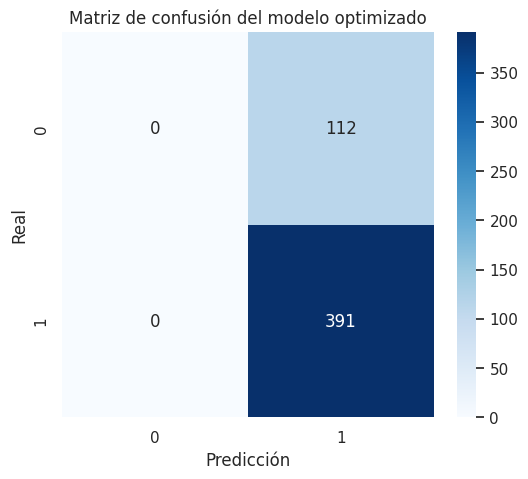

In [89]:
# 🔍 Resultados de la optimización
print("✅ Mejores parámetros encontrados:")
print(random_search.best_params_)

print("\n🎯 Mejor precisión (validación cruzada):")
print(round(random_search.best_score_, 4))

# 🧠 Entrenar el mejor modelo con los parámetros óptimos
best_rf = random_search.best_estimator_
best_rf.fit(X_train, y_train)

# 📊 Evaluar en el conjunto de prueba
y_pred = best_rf.predict(X_test)

# Métricas de rendimiento
print("\n📈 Precisión en datos de prueba:", round(accuracy_score(y_test, y_pred), 4))
print("\n📋 Reporte de clasificación:")
print(classification_report(y_test, y_pred))

# 🔲 Matriz de confusión
plt.figure(figsize=(6, 5))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Matriz de confusión del modelo optimizado")
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.show()

### ✅ Conclución:

* Tras entrenar y evaluar dos modelos de clasificación (Regresión Logística y Random Forest), se observó que Random Forest presentó un mejor rendimiento en precisión y capacidad de generalización.
* La optimización de hiperparámetros permitió mejorar su desempeño y entender la importancia de las variables más influyentes, como el monto de la transacción, el canal utilizado y la ocupación del cliente.
* Estos resultados permiten establecer patrones de comportamiento en las transacciones y podrían servir como base para un modelo de predicción o detección de anomalías en operaciones futuras.